# 5. Bilateral filter

It is well-known that the Bilateral filter can preserve the edge after smoothing operation due to the context filter. 

Please implement a Bilateral filter with/without Gaussian Smoothing Kernel to verify the visualization effect. 

Also, please find the best parameters (sigma_c, sigma_s, kernel size) for the “Noisy.raw”.

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.image as mpimg

 Load image from drive and shows the original image

In [3]:
imgDataNoisy = np.fromfile('data/Noisy.raw', dtype='uint8')

In [4]:
def raw_read(imgData):
    nr = 512
    nc = 512
    nchan = 1
    c = 0 #用 c來記錄 raw檔讀取到的 index位置
    img = np.zeros((nr, nc, nchan))
    for i in range(nr):
        for j in range(nc):
            for k in range(0, nchan):
                img[i, j, k] = imgData[c]
                c=c+1
    return img

In [5]:
img_Noisy= raw_read(imgDataNoisy)

# convolution

In [7]:
def conv(image, filter):
    iw,ih,id = image.shape
    
    fw,fh = filter.shape    
    out = np.zeros((iw-fw+1,ih-fh+1,id))
    
    for d in range(id):
        for w in range(ih-fh+1):
            for h in range(iw-fw+1):
                out[w,h,d] = np.sum(filter*image[w:w+fh , h:h+fw , d])
    
    if id == 1:
        return np.resize(out, (out.shape[0], out.shape[1])).astype(np.uint8)
    else:
        return out.astype(np.uint8)

# show image

In [10]:
def imshow(img):
    if len(img.shape) < 3:
        plt.imshow(img, cmap="gray")
    elif img.shape[2] == 1:
        plt.imshow(np.resize(img,(img.shape[0],img.shape[1])), cmap="gray")
    else:
        plt.imshow(img)

# Bilateral Filter

In [14]:
# bilateral filter
'''
* create Bilateral Filter

- fw,fh: Filter width, filter height
- image: input image 
- sigma1, sigma2: bilateral function parameters
- bilaterealWFilter: weighted bilateral Filteral
'''
def bfunc(i,j,fw,fh,image,sigma1, sigma2, bilateralWFilter):
    imgwork = image[i - fh//2:i+1 + fh//2, j - fw//2:j+1 + fw//2, :]
    
    bilateralIFilter = ((imgwork - image[i, j,:])**2 )/(2*(sigma1**2))
    
    bilateralFilter = np.exp(-1*bilateralIFilter)*bilateralWFilter
    bilateralFilter = bilateralFilter/np.sum(bilateralFilter,axis=(0,1))
    return np.sum(np.multiply(imgwork, bilateralFilter),axis=(0,1))

'''
* apply convolution on given image with the bilateral filter of given size

- image: input image 
- fw,fh: widht and height if bilateral filter
'''
def bilateralFilterConv(image, fw,fh,sigma1,sigma2):
    size = image.shape
    bilateral1 = 2*3.14*sigma2*sigma2*gaussFilter((fw,fh), sigma2)
    if len(image.shape) < 3  or image.shape[2] == 1:
        bilateralWFilter = np.resize(bilateral1,(*bilateral1.shape,1))
    else:
        bilateralWFilter = np.stack([bilateral1, bilateral1, bilateral1], axis=2)
    
    out = np.zeros((size[0]-2*fw +1,size[1]-2*fh +1,size[2]))
    for i in range(size[0]-2*fh +1):
        for j in range(size[1]-2*fw +1):
            out[i,j,:] = bfunc(i+fw-1, j+fh-1, fw, fh, image, sigma1, sigma2, bilateralWFilter)
    
    if id == 1:
        return np.resize(out, (out.shape[0], out.shape[1])).astype(np.uint8)
    else:
        return out.astype(np.uint8)

 ========================================= sigma_c = 40, sigma_s = 40========================================


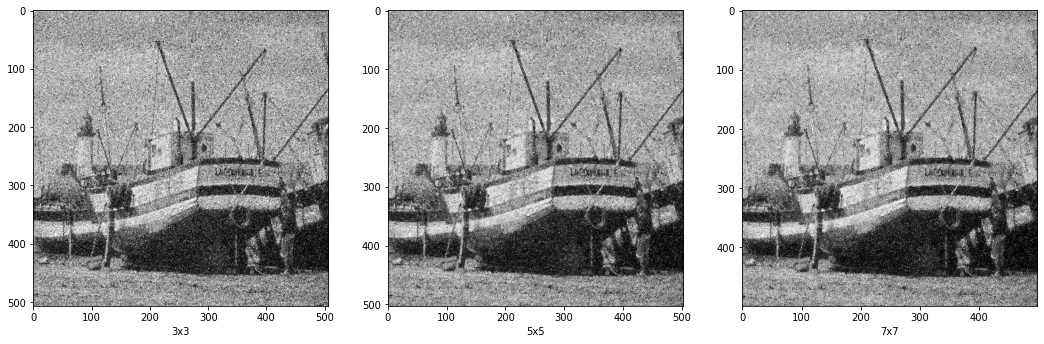

In [21]:
fig = plt.figure(1, figsize=(18, 16))
print(" ========================================= sigma_c = 40, sigma_s = 40========================================")
for i in range(3,8,2):
    splot = plt.subplot(130-1+((i+1)//2))
    splot.set_xlabel(str(i)+"x"+str(i))
    bfw,bfh = (i,i)
    bilateral_image = bilateralFilterConv(img_Noisy, bfw,bfh,40,40)
    imshow(bilateral_image)
plt.show()

 ========================================= sigma_c = 50, sigma_s = 50 =========================================


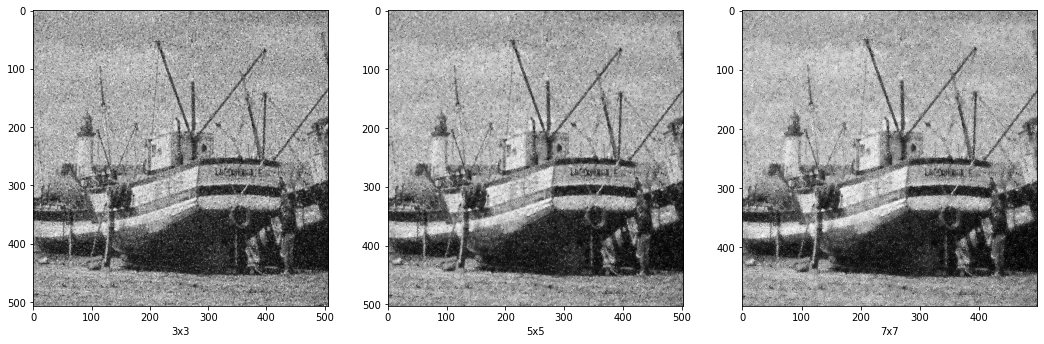

In [22]:
fig = plt.figure(1, figsize=(18, 16))
print(" ========================================= sigma_c = 50, sigma_s = 50 =========================================")
for i in range(3,8,2):
    splot = plt.subplot(130-1+((i+1)//2))
    splot.set_xlabel(str(i)+"x"+str(i))
    bfw,bfh = (i,i)
    bilateral_image = bilateralFilterConv(img_Noisy, bfw,bfh,50,50)
    imshow(bilateral_image)  
plt.show()

 ========================================= sigma_c = 80, sigma_s = 80 =========================================


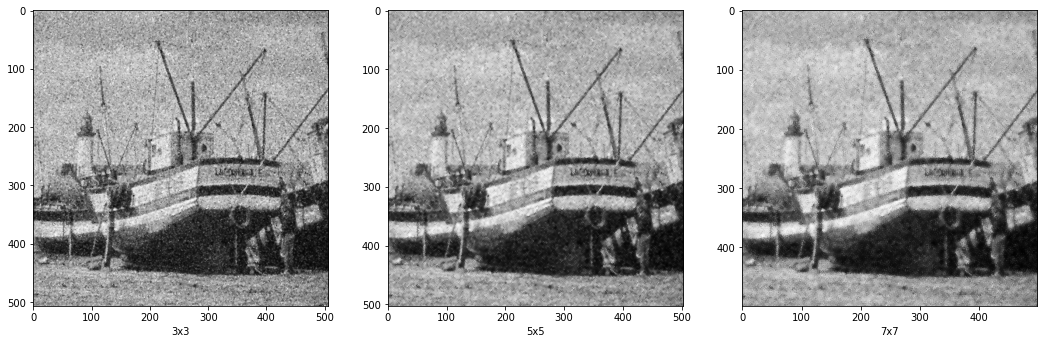

In [23]:
fig = plt.figure(1, figsize=(18, 16))
print(" ========================================= sigma_c = 80, sigma_s = 80 =========================================")
for i in range(3,8,2):
    splot = plt.subplot(130-1+((i+1)//2))
    splot.set_xlabel(str(i)+"x"+str(i))
    bfw,bfh = (i,i)
    bilateral_image = bilateralFilterConv(img_Noisy, bfw,bfh,80,80)
    imshow(bilateral_image)
plt.show()